# Model fitting

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
import jetset
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED
from jetset.test_data_helper import  test_SEDs


In [2]:
test_SEDs

['/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_3C345.ecsv',
 '/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421_EBL_DEABS.ecsv',
 '/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk501_EBL_DEABS.ecsv']

## loading data



In [3]:
data=Data.from_file(test_SEDs[2])



***  binning data  ***
---> N bins= 90
---> bin_widht= 0.2



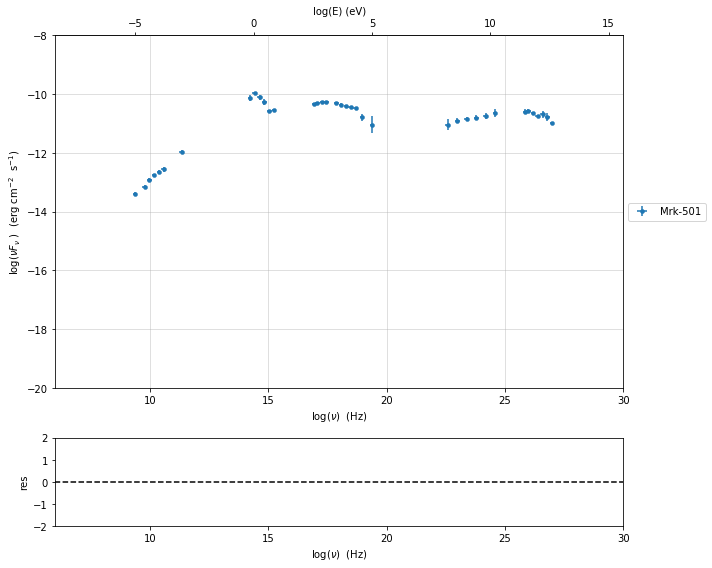

In [4]:
%matplotlib inline
sed_data=ObsData(data_table=data)
sed_data.group_data(bin_width=0.2)

sed_data.add_systematics(0.1,[10.**6,10.**29])
p=sed_data.plot_sed()

## phenomenological model constraining

### spectral indices


*** evaluating spectral indices for data ***
---> initial range for index radio  set to [6.000000,10.000000]
---> range for index radio updated  to [6.000000,10.000000]
---> name = radio            range=[6.000 ,10.000] log(Hz)  photon.val=-1.295207e+00, err=1.359752e-01 

---> initial range for index radio_mm  set to [10.000000,11.000000]
---> range for index radio_mm updated  to [10.000000,11.000000]
---> name = radio_mm         range=[10.000,11.000] log(Hz)  photon.val=-1.455018e+00, err=5.280899e-02 

---> initial range for index mm_IR  set to [11.000000,13.000000]
---> range for index mm_IR updated  to [10.300000,13.700000]
---> name = mm_IR            range=[10.300,13.700] log(Hz)  photon.val=-1.296277e+00, err=3.749585e-02 

---> initial range for index IR_Opt  set to [13.000000,14.000000]
---> range for index IR_Opt updated  to [12.300000,14.700000]
---> name = IR_Opt           range=[12.300,14.700] log(Hz)  photon.val=-2.087455e+00, err=5.433999e-01 

---> initial range for i

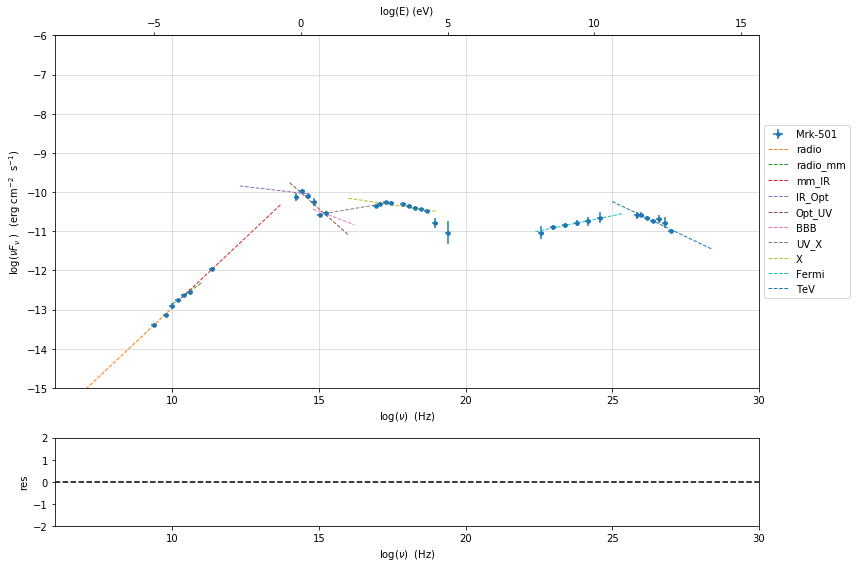

In [5]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices(silent=True)
p=my_shape.plot_indices()
p.rescale(y_min=-15,y_max=-6)

### sed shaper

In [6]:
mm,best_fit=my_shape.sync_fit(check_host_gal_template=True,
                  Ep_start=None,
                  minimizer='lsb',
                  silent=True,
                  fit_range=[10. , 21.])


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [10, 21]
---> class:  HSP

---> class:  HSP


 model name     name      bestfit val     err +     err -   start val   fit range min fit range max frozen
----------- ------------ ------------- ------------ ----- ------------- ------------- ------------- ------
   LogCubic            b -6.411137e-02 7.838980e-03    -- -4.778765e-02 -1.000000e+01  0.000000e+00  False
   LogCubic            c -1.751731e-03 1.126958e-03    --  3.576198e-03 -1.000000e+01  1.000000e+01  False
   LogCubic           Ep  1.703748e+01 9.437383e-02    --  1.626870e+01  0.000000e+00  3.000000e+01  False
   LogCubic           Sp -1.030068e+01 1.884109e-02    -- -1.025412e+01 -3.000000e+01  0.000000e+00  False
host_galaxy nuFnu_p_host -1.006553e+01 5.462394e-02    -- -1.025412e+01 -1.225412e+01 -8.254123e+00  False
host_galaxy     nu_scale  1.730797e-02 3.694782e-03    --  0.000000e+00 -5.000000e-01  5.000000e-01  False

In [7]:
best_fit.show_report()


**************************************************************************************************
Fit report

Model: sync-shape-fit
 model name     name       par type       units          val      phys. bound. min phys. bound. max  log  frozen
----------- ------------ ------------ ------------- ------------- ---------------- ---------------- ----- ------
   LogCubic            b    curvature               -6.411137e-02    -1.000000e+01     0.000000e+00 False  False
   LogCubic            c third-degree               -1.751731e-03    -1.000000e+01     1.000000e+01 False  False
   LogCubic           Ep    peak freq            Hz  1.703748e+01     0.000000e+00     3.000000e+01  True  False
   LogCubic           Sp    peak flux erg / (cm2 s) -1.030068e+01    -3.000000e+01     0.000000e+00  True  False
host_galaxy nuFnu_p_host  nuFnu-scale erg / (cm2 s) -1.006553e+01    -2.000000e+01     2.000000e+01 False  False
host_galaxy     nu_scale     nu-scale            Hz  1.730797e-02    -2.000


*** Log-Polynomial fitting of the IC component ***
---> fit range: [23, 29]
---> LogCubic fit

**************************************************************************************************
Fit report

Model: IC-shape-fit
model name name   par type       units          val      phys. bound. min phys. bound. max  log  frozen
---------- ---- ------------ ------------- ------------- ---------------- ---------------- ----- ------
  LogCubic    b    curvature               -1.310958e-01    -1.000000e+01     0.000000e+00 False  False
  LogCubic    c third-degree               -3.300308e-02    -1.000000e+01     1.000000e+01 False  False
  LogCubic   Ep    peak freq            Hz  2.549604e+01     0.000000e+00     3.000000e+01  True  False
  LogCubic   Sp    peak flux erg / (cm2 s) -1.057946e+01    -3.000000e+01     0.000000e+00  True  False

converged=True
calls=217
------------------------------------------------------------------
| FCN = 1.997                   |     Ncalls=216 (216 to

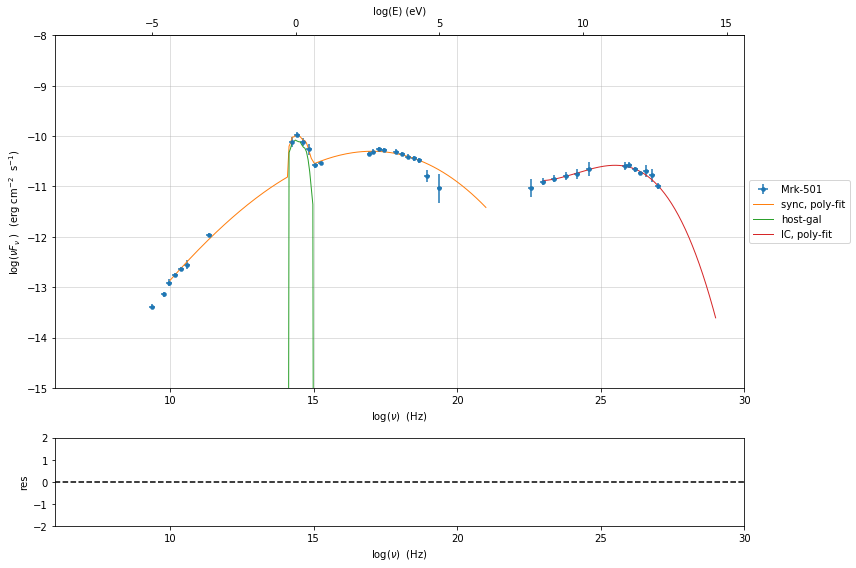

In [8]:
my_shape.IC_fit(fit_range=[23., 29.],minimizer='minuit')
p=my_shape.plot_shape_fit()
p.rescale(y_min=-15)

### model constraining

In [9]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
from jetset.minimizer import fit_SED
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.001,0.1],
                        distr_e='lppl',
                        t_var_sec=3*86400,
                        nu_cut_IR=1E11,
                        SEDShape=my_shape)


prefit_jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False)
prefit_jet.save_model('prefit_jet_gal_templ.pkl')


***  constrains parameters from observable ***

---> ***  emitting region parameters  ***
---> name = beam_obj          type = beaming               units = Lorentz-factor*   val = +2.500000e+01  phys-bounds = [+1.000000e-04,No           ] islog = False  froze= False 
---> setting par type redshift, corresponding to par z_cosm
--->  name = z_cosm            type = redshift              units =                   val = +3.360000e-02  phys-bounds = [+0.000000e+00,No           ] islog = False  froze= False 

---> setting par type magnetic_field, corresponding to par B
--->  name = B                 type = magnetic_field        units = G                 val = +5.050000e-02  phys-bounds = [+0.000000e+00,No           ] islog = False  froze= False 

---> setting par type region_size, corresponding to par R
--->  name = R                 type = region_size           units = cm                val = +1.879504e+17  phys-bounds = [+1.000000e+03,+1.000000e+30] islog = False  froze= False 


---> **

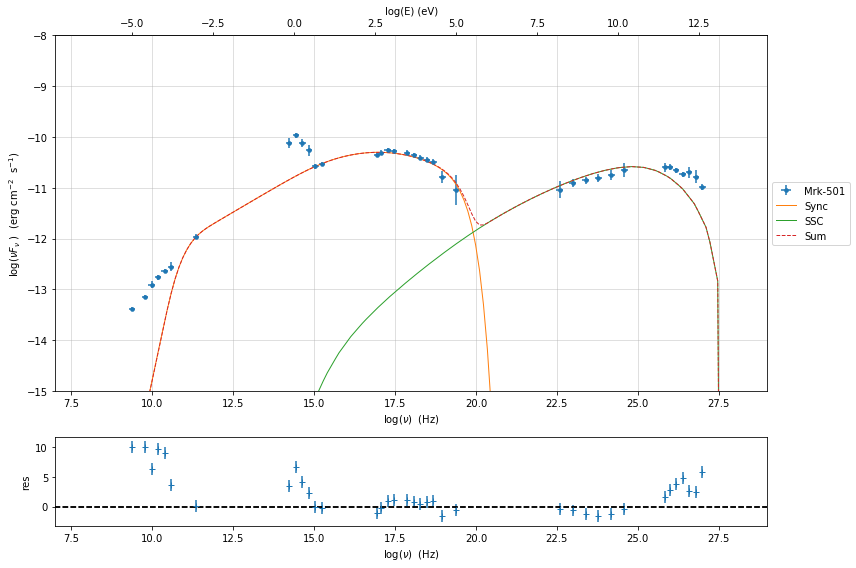

In [10]:
pl=prefit_jet.plot_model(sed_data=sed_data)
pl.add_residual_plot(prefit_jet,sed_data)
pl.rescale(y_min=-15,x_min=7,x_max=29)

## Model fitting

### Model fitting with LSB

In [17]:
from jetset.model_manager import  FitModel
from jetset.jet_model import Jet

jet_lsb=Jet.load_model('prefit_jet_gal_templ.pkl')
jet_lsb.set_gamma_grid_size(200)

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 1.057074e+02     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.642067e+06     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 1.078507e+02     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.248787e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 3.205569e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 7.432155e+03     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 5.485593e+15     1.000000e+03     1.000000e

In [18]:
fit_model_lsb=FitModel( jet=jet_lsb, name='SSC-best-fit-lsb',template=my_shape.host_gal) 
fit_model_lsb.show_model()


-------------------------------------------------------------------------------------------------------------------
Composite model description
-------------------------------------------------------------------------------------------------------------------
name: SSC-best-fit-lsb  
type: composite_model  
components models:
 -model name: jet_leptonic model type: jet
 -model name: host_galaxy model type: template

-------------------------------------------------------------------------------------------------------------------
individual component description


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: jet_leptonic  

electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 1.057074e+02
 gmax grid : 1.642067e+06
 normalization  True
 log-values 

In [20]:
fit_model_lsb.freeze('jet_leptonic','z_cosm')
fit_model_lsb.freeze('jet_leptonic','R_H')
fit_model_lsb.jet_leptonic.parameters.beam_obj.fit_range=[5., 50.]
fit_model_lsb.jet_leptonic.parameters.R.fit_range=[10**15.5,10**17.5]
fit_model_lsb.jet_leptonic.parameters.gmax.fit_range=[1E4,1E8]
fit_model_lsb.host_galaxy.parameters.nuFnu_p_host.frozen=False
fit_model_lsb.host_galaxy.parameters.nu_scale.frozen=True

In [22]:
from jetset.minimizer import fit_SED,ModelMinimizer

model_minimizer_lsb=ModelMinimizer('lsb')
model_minimizer_lsb.minimizer.xtol=1E-9
model_minimizer_lsb.minimizer.ftol=1E-9
model_minimizer_lsb.minimizer.factor=.01

In [23]:
best_fit_lsb=model_minimizer_lsb.fit(fit_model_lsb,sed_data,10.0**11,10**29.0,fitname='SSC-best-fit-lsb')

filtering data in fit range = [1.000000e+11,1.000000e+29]
data length 31

*** start fit process ***
----- 
/ minim function calls=220, chisq=16.429128 UL part=-0.000000
**************************************************************************************************
Fit report

Model: SSC-best-fit-lsb
 model name        name             par type           units           val      phys. bound. min phys. bound. max  log  frozen
------------ ---------------- ------------------- --------------- ------------- ---------------- ---------------- ----- ------
jet_leptonic             gmin  low-energy-cut-off lorentz-factor*  9.923323e+01     1.000000e+00     1.000000e+09 False  False
jet_leptonic             gmax high-energy-cut-off lorentz-factor*  3.483280e+07     1.000000e+00     1.000000e+15 False  False
jet_leptonic                N    emitters_density         1 / cm3  4.675647e+01     0.000000e+00               -- False  False
jet_leptonic                s   LE_spectral_slope            

In [34]:
best_fit_lsb.save_report('SSC-best-fit-lsb.txt')
model_minimizer_lsb.save_model('model_minimizer_lsb.pkl')
fit_model_lsb.save_model('fit_model_lsb.pkl')

best_fit_lsb.bestfit_table

model name,name,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
str12,str16,float64,float64,float64,float64,float64,float64,bool
jet_leptonic,gmin,9.923323e+01,3.357296e+02,--,1.057074e+02,1.000000e+00,1.000000e+09,False
jet_leptonic,gmax,3.483280e+07,7.220431e+07,--,1.642067e+06,1.000000e+04,1.000000e+08,False
jet_leptonic,N,4.675647e+01,2.431489e+02,--,1.078507e+02,0.000000e+00,--,False
jet_leptonic,s,2.240451e+00,1.227618e-01,--,2.248787e+00,-1.000000e+01,1.000000e+01,False
jet_leptonic,r,3.555351e-01,4.171805e-02,--,3.205569e-01,-1.500000e+01,1.500000e+01,False
jet_leptonic,gamma0_log_parab,1.679068e+04,1.654656e+04,--,7.432155e+03,1.000000e+00,1.000000e+09,False
jet_leptonic,R,8.682026e+15,2.328367e+16,--,5.485593e+15,3.162278e+15,3.162278e+17,False
jet_leptonic,R_H,--,--,--,1.000000e+17,0.000000e+00,--,True
jet_leptonic,B,1.725295e-02,1.872495e-02,--,1.000000e-01,0.000000e+00,--,False


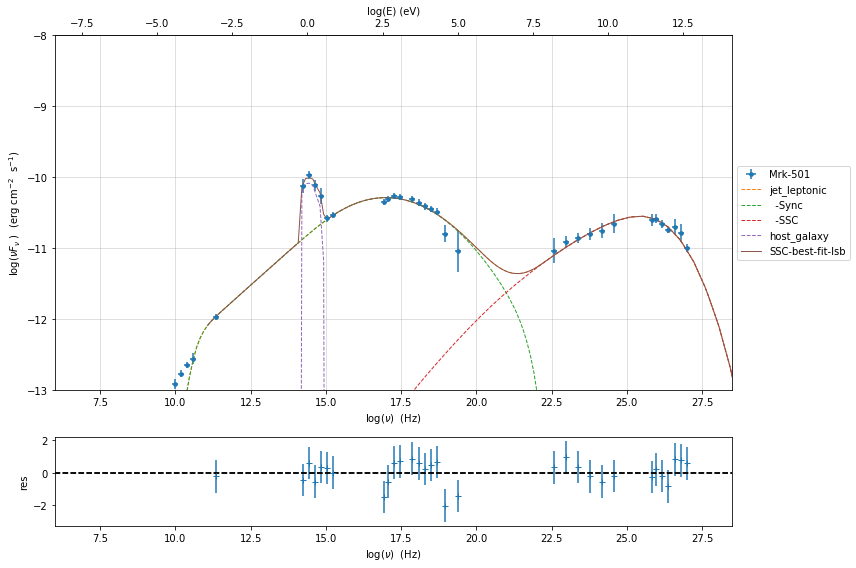

In [26]:
%matplotlib inline
fit_model_lsb.set_nu_grid(1E6,1E30,200)
fit_model_lsb.eval()
p2=fit_model_lsb.plot_model(sed_data=sed_data)
p2.rescale(y_min=-13,x_min=6,x_max=28.5)

### Model fitting with Minuit

In [39]:
jet_minuit=Jet.load_model('prefit_jet_gal_templ.pkl')
jet_minuit.set_gamma_grid_size(200)

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 1.057074e+02     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.642067e+06     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 1.078507e+02     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.248787e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 3.205569e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 7.432155e+03     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 5.485593e+15     1.000000e+03     1.000000e

In [41]:
fit_model_minuit=FitModel( jet=jet_minuit, name='SSC-best-fit-minuit',template=my_shape.host_gal) 
fit_model_minuit.show_model_components()
fit_model_minuit.freeze('jet_leptonic','z_cosm')
fit_model_minuit.freeze('jet_leptonic','R_H')
fit_model_minuit.jet_leptonic.parameters.beam_obj.fit_range=[5., 50.]
fit_model_minuit.jet_leptonic.parameters.R.fit_range=[10**15.5,10**17.5]
fit_model_minuit.host_galaxy.parameters.nuFnu_p_host.frozen=False
fit_model_minuit.host_galaxy.parameters.nu_scale.frozen=True

model_minimizer_minuit=ModelMinimizer('minuit')
best_fit_minuit=model_minimizer_minuit.fit(fit_model_minuit,sed_data,10.0**11,10**29.0,fitname='SSC-best-fit-minuit')


-------------------------------------------------------------------------------------------------------------------
Composite model description
-------------------------------------------------------------------------------------------------------------------
name: SSC-best-fit-minuit  
type: composite_model  
components models:
 -model name: jet_leptonic model type: jet
 -model name: host_galaxy model type: template

-------------------------------------------------------------------------------------------------------------------
filtering data in fit range = [1.000000e+11,1.000000e+29]
data length 31

*** start fit process ***
----- 
/ minim function calls=1300, chisq=16.350224 UL part=-0.000000
**************************************************************************************************
Fit report

Model: SSC-best-fit-minuit
 model name        name             par type           units           val      phys. bound. min phys. bound. max  log  frozen
------------ -------------

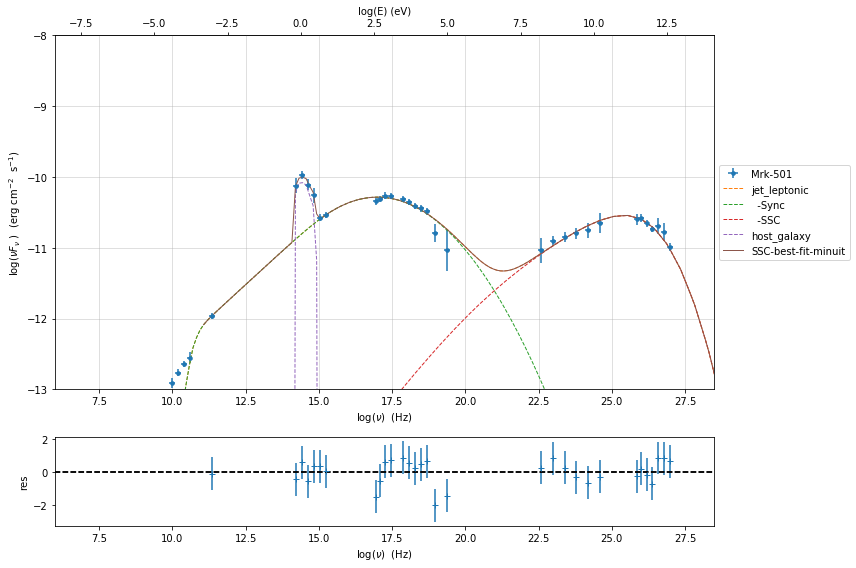

In [42]:
%matplotlib inline
fit_model_minuit.set_nu_grid(1E6,1E30,200)
fit_model_minuit.eval()
p2=fit_model_minuit.plot_model(sed_data=sed_data)
p2.rescale(y_min=-13,x_min=6,x_max=28.5)

In [43]:
model_minimizer_minuit.minimizer.mesg

------------------------------------------------------------------
| FCN = 16.35                   |    Ncalls=1300 (1304 total)    |
| EDM = 0.0116 (Goal: 1E-05)    |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
-------------------------------------------------------------------------------------------
|   | Name  |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-------------------------------------------------------------------------------------------
| 0 | par_0 |    69     |     6     |            |            |    1    |  1e+09  |       |
| 1 | par_1 |  1.042E9  |  0.000E9  |            |            |    1    |  1e+15  |       |
| 2 | par_2 |    82     |    14     |            |            |    0    |         |       |
| 3 | par_3 |   2.239   |   0.030   |            |            |   -10   |   10    |       |
| 4 | par_4 |   0.356   |   0.030   |            |            |   -15   |   15    |       |
| 5 | par_5 |   1.6E4   |   0.4E4   |            |            |    1    |  1e+09  |       |
| 6 | par_6 |  0.80E16  |  0.04E16  |            |            |3.16228e+15|3.16228e+17|       |
| 7 | par_7 |  1.88E-2  |  0.12E-2  |            |            |    0    |         |       |
| 8 | par_8 |   46.9    |    1.5    |            |            |    5    |   50    |       |
| 9 | par_9 |  -10.05   |    0.05   |            |            |-12.2541 |-8.25412 |       |
-------------------------------------------------------------------------------------------

In [45]:
best_fit_minuit.save_report('SSC-best-fit-minuit.txt')
model_minimizer_minuit.save_model('model_minimizer_minuit.pkl')
fit_model_minuit.save_model('fit_model_minuit.pkl')

best_fit_lsb.bestfit_table

model name,name,bestfit val,err +,err -,start val,fit range min,fit range max,frozen
str12,str16,float64,float64,float64,float64,float64,float64,bool
jet_leptonic,gmin,9.933670e+01,5.529038e+02,--,9.923323e+01,1.000000e+00,1.000000e+09,False
jet_leptonic,gmax,2.750544e+07,2.997142e+07,--,3.483280e+07,1.000000e+04,1.000000e+08,False
jet_leptonic,N,4.673545e+01,7.346827e+02,--,4.675647e+01,0.000000e+00,--,False
jet_leptonic,s,2.237616e+00,1.627299e-01,--,2.240451e+00,-1.000000e+01,1.000000e+01,False
jet_leptonic,r,3.574259e-01,4.095070e-02,--,3.555351e-01,-1.500000e+01,1.500000e+01,False
jet_leptonic,gamma0_log_parab,1.682607e+04,6.156721e+04,--,1.679068e+04,1.000000e+00,1.000000e+09,False
jet_leptonic,R,8.631851e+15,7.652252e+16,--,8.682026e+15,3.162278e+15,3.162278e+17,False
jet_leptonic,R_H,--,--,--,1.000000e+17,0.000000e+00,--,True
jet_leptonic,B,1.730963e-02,5.405179e-02,--,1.725295e-02,0.000000e+00,--,False


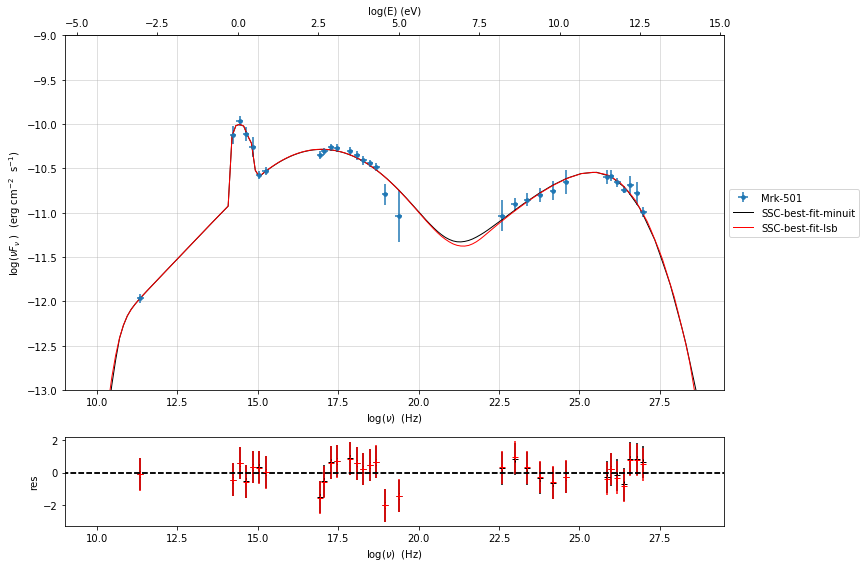

In [53]:
%matplotlib inline
from jetset.plot_sedfit import PlotSED
fit_model_minuit.set_nu_grid(1E6,1E30,200)
fit_model_minuit.eval()
fit_model_lsb.set_nu_grid(1E6,1E30,200)
fit_model_lsb.eval()
p2=PlotSED()
p2.add_data_plot(sed_data,fit_range=[ 11., 29.])
p2.add_model_plot(fit_model_minuit,color='black')
p2.add_residual_plot(fit_model_minuit,sed_data,fit_range=[ 11., 29.],color='black')
p2.add_model_plot(fit_model_lsb,color='red')
p2.add_residual_plot(fit_model_lsb,sed_data,fit_range=[ 11., 29.],color='red')
p2.rescale(y_min=-13,y_max=-9,x_min=9,x_max=29.5)

### Model fitting with a bkn pl


In [66]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
from jetset.minimizer import fit_SED
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.001,0.1],
                        distr_e='bkn',
                        t_var_sec=3*86400,
                        nu_cut_IR=1E11,
                        SEDShape=my_shape)


prefit_jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False)
prefit_jet.save_model('prefit_jet_bkn_gal_templ.pkl')


***  constrains parameters from observable ***

---> ***  emitting region parameters  ***
---> name = beam_obj          type = beaming               units = Lorentz-factor*   val = +2.500000e+01  phys-bounds = [+1.000000e-04,No           ] islog = False  froze= False 
---> setting par type redshift, corresponding to par z_cosm
--->  name = z_cosm            type = redshift              units =                   val = +3.360000e-02  phys-bounds = [+0.000000e+00,No           ] islog = False  froze= False 

---> setting par type magnetic_field, corresponding to par B
--->  name = B                 type = magnetic_field        units = G                 val = +5.050000e-02  phys-bounds = [+0.000000e+00,No           ] islog = False  froze= False 

---> setting par type region_size, corresponding to par R
--->  name = R                 type = region_size           units = cm                val = +1.879504e+17  phys-bounds = [+1.000000e+03,+1.000000e+30] islog = False  froze= False 


---> **

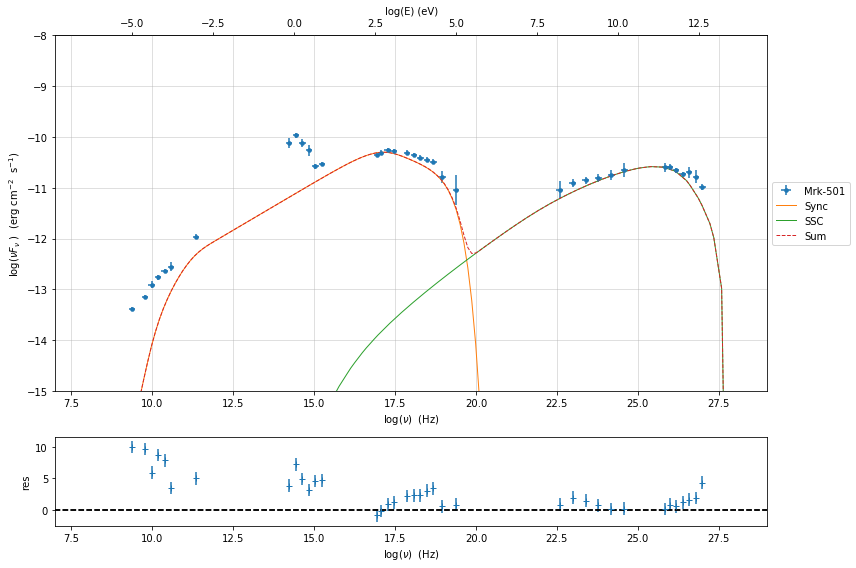

In [67]:
pl=prefit_jet.plot_model(sed_data=sed_data)
pl.add_residual_plot(prefit_jet,sed_data)
pl.rescale(y_min=-15,x_min=7,x_max=29)

In [69]:
jet_minuit_bkn=Jet.load_model('prefit_jet_bkn_gal_templ.pkl')
jet_minuit_bkn.set_gamma_grid_size(200)


fit_model_minuit_bkn=FitModel( jet=jet_minuit_bkn, name='SSC-best-fit-minuit',template=my_shape.host_gal) 
fit_model_minuit_bkn.show_model_components()
fit_model_minuit_bkn.freeze('jet_leptonic','z_cosm')
fit_model_minuit_bkn.freeze('jet_leptonic','R_H')
fit_model_minuit_bkn.jet_leptonic.parameters.beam_obj.fit_range=[5,50]
fit_model_minuit_bkn.jet_leptonic.parameters.R.fit_range=[10**15.5,10**17.5]
fit_model_minuit_bkn.host_galaxy.parameters.nuFnu_p_host.frozen=False
fit_model_minuit_bkn.host_galaxy.parameters.nu_scale.frozen=True

model_minimizer_minuit_bkn=ModelMinimizer('minuit')
best_fit_minuit_bkn=model_minimizer_minuit.fit(fit_model_minuit_bkn,sed_data,10.0**11,10**29.0,fitname='SSC-best-fit-minuit-bkn')

    name          par type           units          val      phys. bound. min phys. bound. max  log  frozen
----------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
       gmin  low-energy-cut-off lorentz-factor* 1.888625e+02     1.000000e+00     1.000000e+09 False  False
       gmax high-energy-cut-off lorentz-factor* 1.955869e+06     1.000000e+00     1.000000e+15 False  False
          N    emitters_density         1 / cm3 2.193489e+01     0.000000e+00               -- False  False
          p   LE_spectral_slope                 2.248787e+00    -1.000000e+01     1.000000e+01 False  False
        p_1   HE_spectral_slope                 3.500000e+00    -1.000000e+01     1.000000e+01 False  False
gamma_break    turn-over-energy lorentz-factor* 1.971908e+05     1.000000e+00     1.000000e+09 False  False
          R         region_size              cm 1.045229e+16     1.000000e+03     1.000000e+30 False  False
        R_H     region_posit

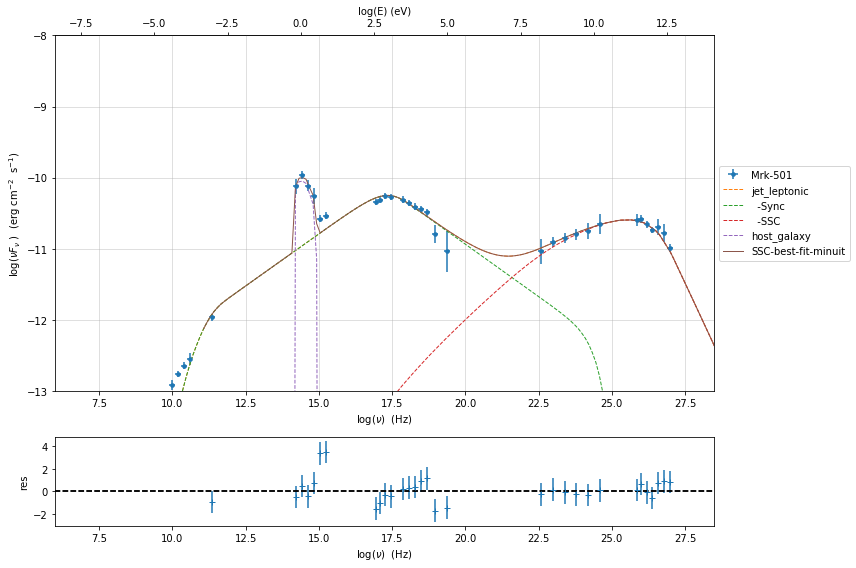

In [70]:
%matplotlib inline
fit_model_minuit_bkn.set_nu_grid(1E6,1E30,200)
fit_model_minuit_bkn.eval()
p2=fit_model_minuit_bkn.plot_model(sed_data=sed_data)
p2.rescale(y_min=-13,x_min=6,x_max=28.5)

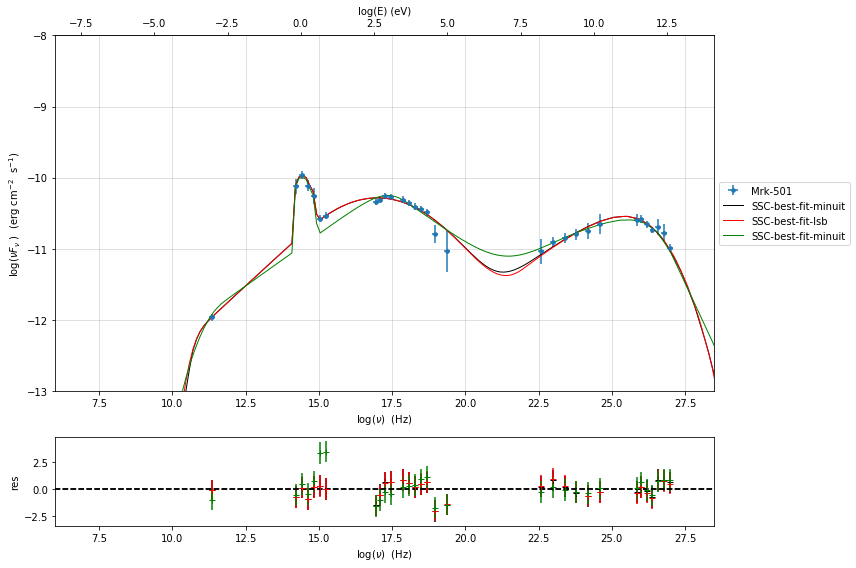

In [71]:
%matplotlib inline
from jetset.plot_sedfit import PlotSED
fit_model_minuit_bkn.set_nu_grid(1E6,1E30,200)
fit_model_minuit_bkn.eval()
fit_model_minuit.set_nu_grid(1E6,1E30,200)
fit_model_minuit.eval()
fit_model_lsb.set_nu_grid(1E6,1E30,200)
fit_model_lsb.eval()
p2=PlotSED()
p2.add_data_plot(sed_data,fit_range=[ 11., 29.])
p2.add_model_plot(fit_model_minuit,color='black')
p2.add_residual_plot(fit_model_minuit,sed_data,fit_range=[ 11. ,29.],color='black')
p2.add_model_plot(fit_model_lsb,color='red')
p2.add_residual_plot(fit_model_lsb,sed_data,fit_range=[ 11., 29.],color='red')
p2.add_model_plot(fit_model_minuit_bkn,color='green')
p2.add_residual_plot(fit_model_minuit_bkn,sed_data,fit_range=[ 11., 29.],color='green')
p2.rescale(y_min=-13,x_min=6,x_max=28.5)

In [72]:
from jetset.mcmc import McmcSampler
from jetset.minimizer import ModelMinimizer


In [79]:
model_minimizer_minuit = ModelMinimizer.load_model('model_minimizer_minuit.pkl')


mcmc=McmcSampler(model_minimizer_minuit)

labels=['N','B','beam_obj','s','gamma0_log_parab']
model_name='jet_leptonic'
use_labels_dict={model_name:labels}

mcmc.run_sampler(nwalkers=128,burnin=10,steps=50,bound=5.0,bound_rel=True,threads=None,walker_start_bound=0.005,use_labels_dict=use_labels_dict)

mcmc run starting


100%|██████████| 50/50 [05:24<00:00,  6.50s/it]

mcmc run done, with 1 threads took 331.91 seconds


In [80]:
print(mcmc.acceptance_fraction)

0.5440625


In [104]:
p=mcmc.plot_model(sed_data=sed_data,fit_range=[11., 27.],size=50)
p.rescale(y_min=-13,x_min=6,x_max=28.5)

TypeError: float() argument must be a string or a number, not 'list'

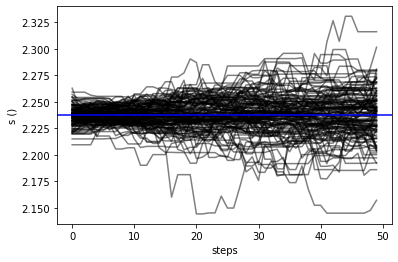

In [82]:
f=mcmc.plot_chain('s',log_plot=False)

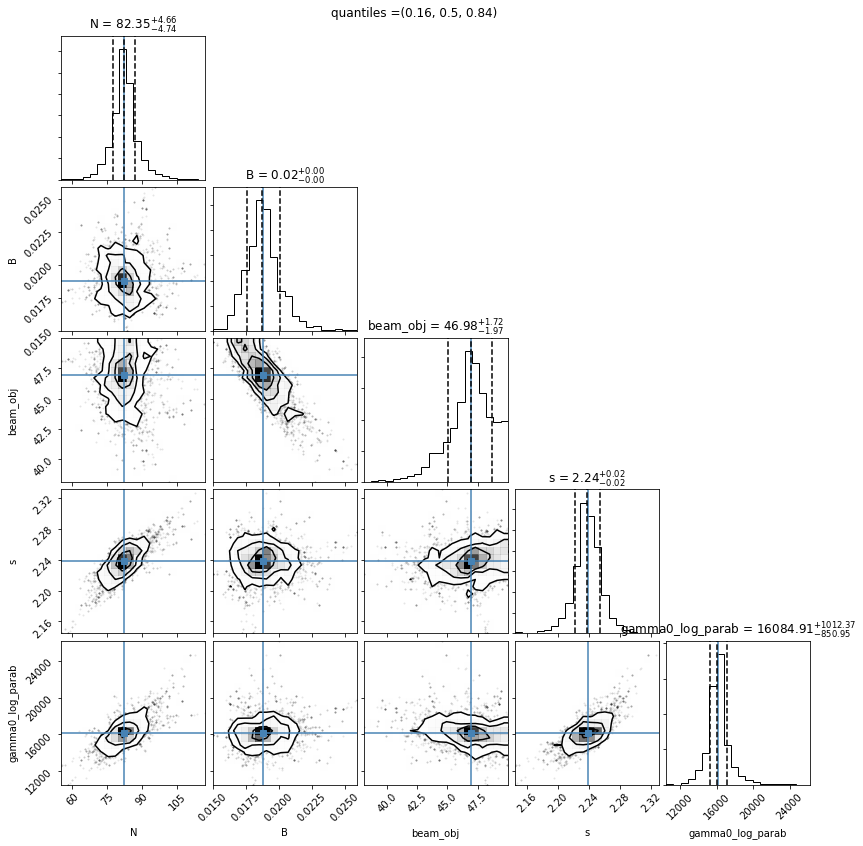

In [83]:
f=mcmc.corner_plot()

In [84]:
mcmc.get_par('N')

(array([82.09077278, 84.3737689 , 82.02349605, ..., 90.91967156,
        94.65552072, 84.47514526]),
 0)

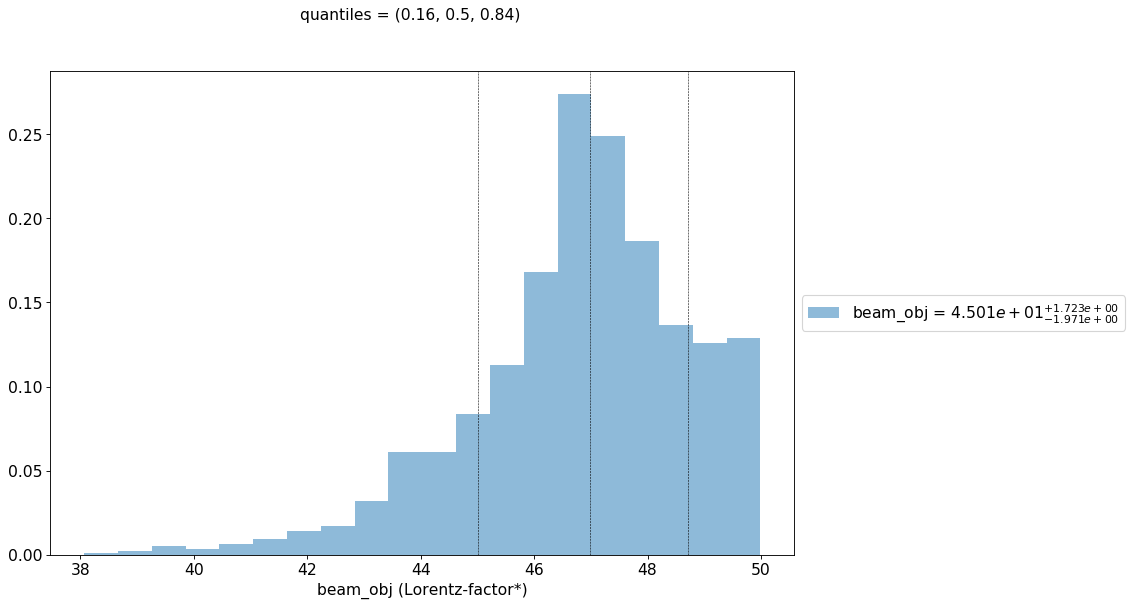

In [85]:
f=mcmc.plot_par('beam_obj')

In [86]:
mcmc.save('mcmc_sampler.pkl')

In [87]:
ms=McmcSampler.load('mcmc_sampler.pkl')

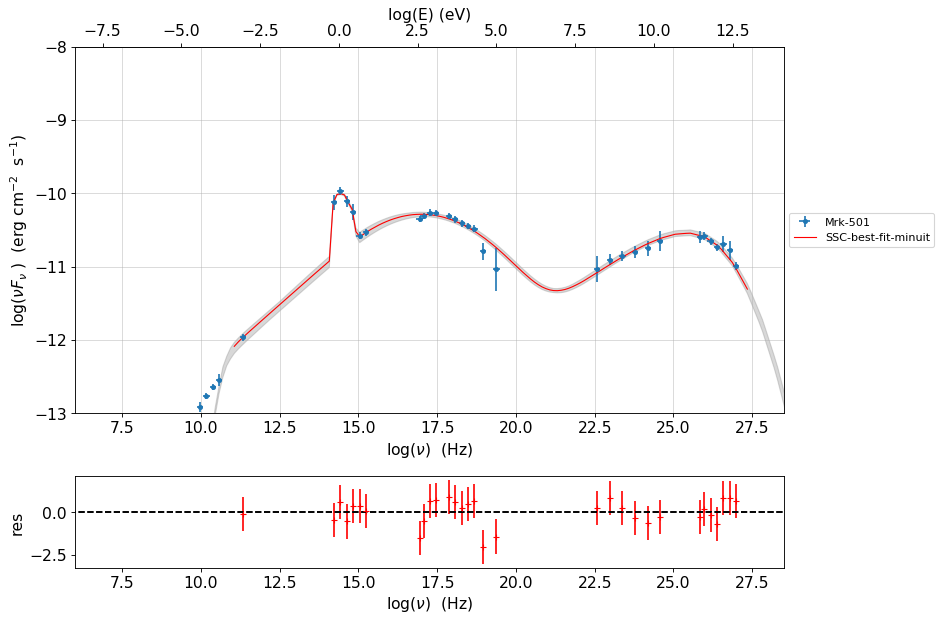

In [116]:
p=ms.plot_model(sed_data=sed_data,fit_range=[11., 27.4],size=50)
p.rescale(y_min=-13,x_min=6,x_max=28.5)

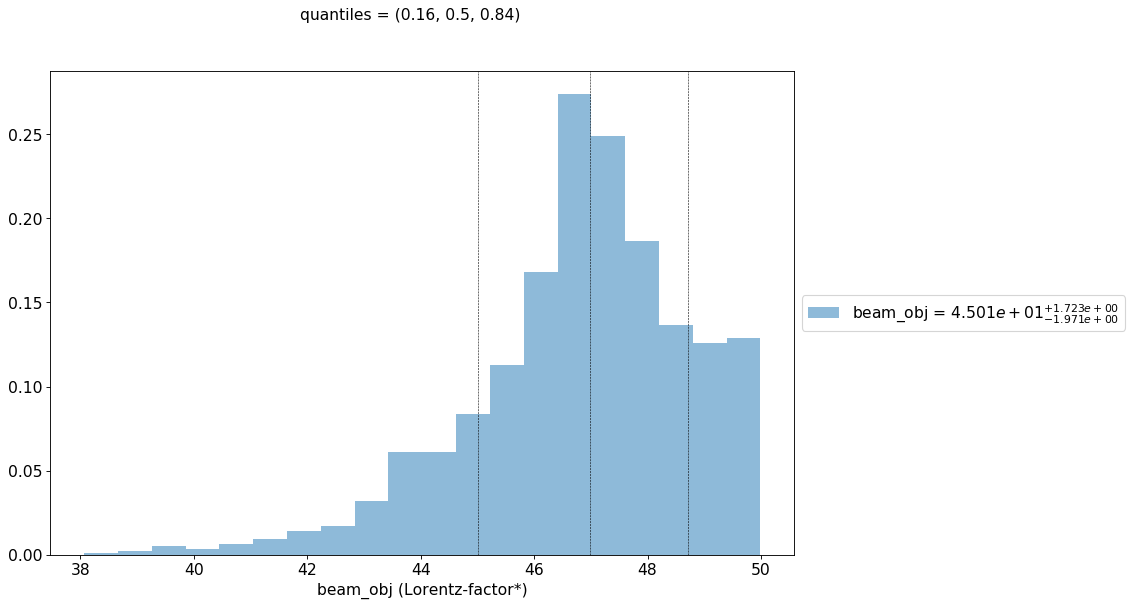

In [92]:
f=ms.plot_par('beam_obj',log_plot=False)


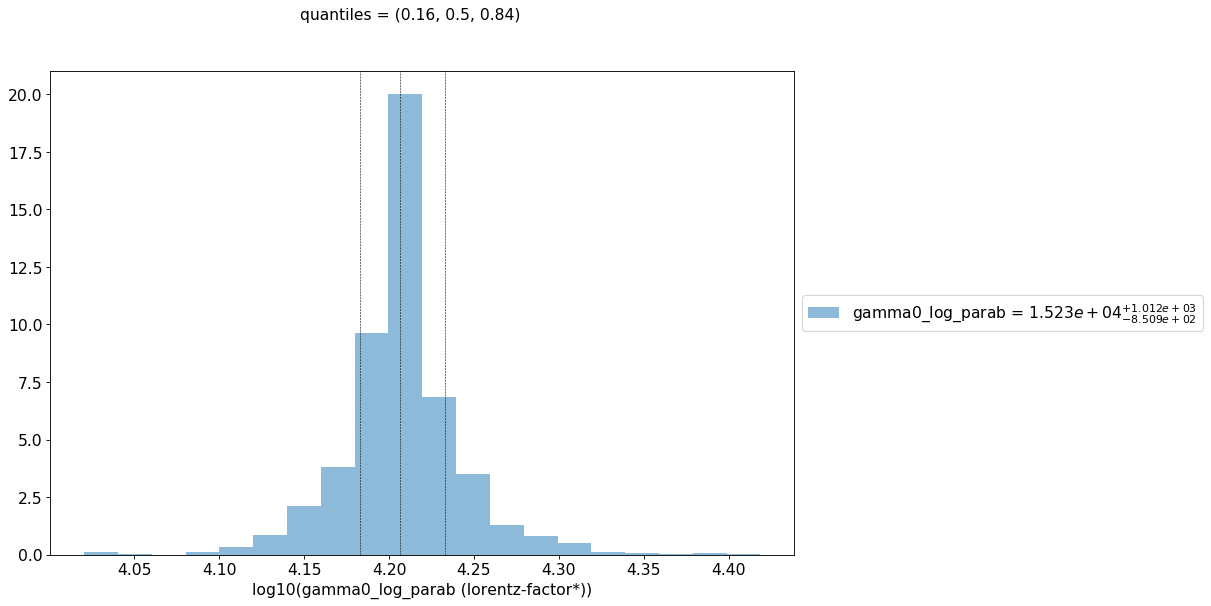

In [95]:
f=ms.plot_par('gamma0_log_parab',log_plot=True)


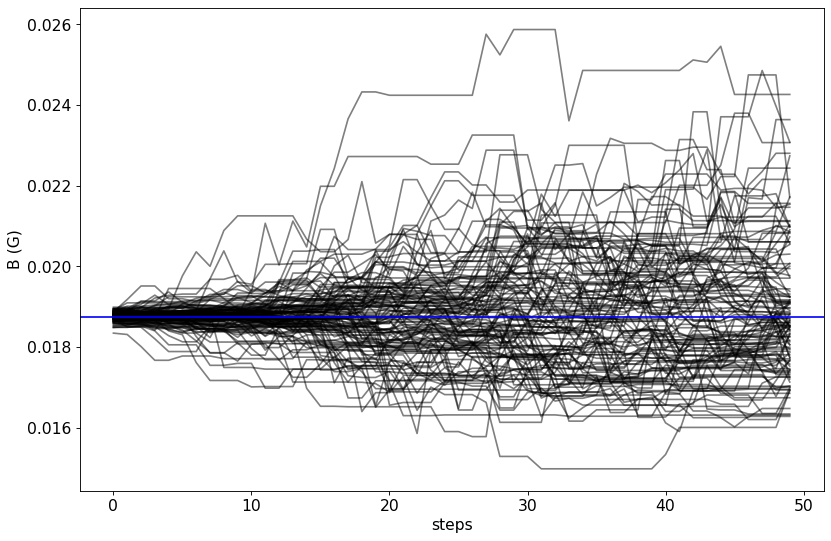

In [96]:
f=ms.plot_chain('B',log_plot=False)

In [117]:
fit_model_lsb.set('R',val=5)

TypeError: set() missing 1 required positional argument: 'par_name'

In [113]:
1E27

1e+27